#Introduction


---
Nama : Hana Rifdah Sakinah - 006


**Dataset Information**


*   **Date** : The date of observation
*   **Location** : The common name of the location of the weather station
* **MinTemp** : The minimum temperature in degrees celsius
* **MaxTemp** : The maximum temperature in degrees celsius
* **Rainfall** : The amount of rainfall recorded for the day in mm
* **Evaporation**: The so-called Class A pan evaporation (mm) in the 24 hours to 9am
* **Sunshine** : The number of hours of bright sunshine in the day.
* **WindGustDir** : The direction of the strongest wind gust in the 24 hours to midnight
* **WinGustSpeed** : The speed (km/h) of the strongest wind gust in the 24 hours to midnight
* **WinDir9am** : Direction of the wind at 9am
* **WinDir3pm** : Direction of the wind at 3pm
* **WindSpeed9am** : Wind speed (km/hr) averaged over 10 minutes prior to 9am
* **WindSpeed3pm** : Wind speed (km/hr) averaged over 10 minutes prior to 3pm
* **Humidity9am** : Humidity (percent) at 9am
* **Humidity3pm** : Humidity (percent) at 3pm
* **Pressure9am** : Atmospheric pressure (hpa) reduced to mean sea level at 9am
*  **Pressure3pm** : Atmospheric pressure (hpa) reduced to mean sea level at 3pm
* **Cloud9am** : Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. It records how many eigths of the sky are obscured by cloud. A 0 measure indicates completely clear sky whilst an 8 indicates that it is completely overcast.
* **Cloud3pm** : Fraction of sky obscured by cloud (in "oktas": eighths) at 3pm. See Cload9am for a description of the values
* **Temp9am** : Temperature (degrees C) at 9am
* **Temp3pm** : Temperature (degrees C) at 3pm
* **RainToday** : Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
* **RainTomorrow** : The amount of next day rain in mm. Used to create response variable RainTomorrow. A kind of measure of the "risk".



In [192]:
!pip install feature-engine
import warnings 
warnings.filterwarnings('ignore')

In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
import warnings 
warnings.filterwarnings('ignore')

from feature_engine.outliers import Winsorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.utils import shuffle

#Data Loading

In [194]:
df = pd.read_csv('https://raw.githubusercontent.com/hanarifdahs/datasets/main/weatherAUS.csv')

In [195]:
df.shape

(145460, 23)

In [196]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [198]:
df['Location'].nunique()

49

In [199]:
df['Sunshine'].unique()

array([ nan, 12.3, 13. , 13.3, 10.6, 12.2,  8.4,  0. , 12.6, 13.2, 12.7,
       12.1, 10.3, 13.1, 12.9, 11.3,  6.9, 10.9,  3.7,  5.9, 10.5, 12.4,
       13.4, 13.6,  7.4, 10. ,  2.3,  6.6,  0.3, 10.7, 11.6, 10.2,  9. ,
       12. ,  3. ,  7.9, 11.5, 11.2,  4.8,  5.8,  6. , 11.1, 11.8, 11.4,
       10.8,  7.8, 11. ,  5.5,  4.7,  4.2,  4.4,  6.2,  9.8,  9.9,  4.3,
        8. ,  9.6, 10.4,  9.3,  8.7,  7.6,  7.5, 10.1,  6.3,  2.8,  0.7,
        9.4,  9.7,  0.6,  5.1,  8.3,  4.1,  3.9,  6.8,  8.6,  2.7,  8.2,
        3.1,  1.8,  0.1,  0.8,  3.4,  7.1,  5. ,  5.7,  6.1,  7. ,  2.9,
        2.5,  4.6,  8.9,  9.1,  1.7,  8.1,  9.5,  1.2,  1.4,  8.8,  2.2,
        3.5,  9.2,  1.9, 11.7, 11.9,  7.7,  0.9, 12.5,  2.1, 12.8, 13.7,
        8.5,  0.2,  4. ,  2.4,  5.2,  0.5,  6.4,  4.5,  1.1,  2. ,  0.4,
        1.5,  3.3,  6.5,  2.6,  3.8,  3.6,  3.2,  6.7,  5.4,  7.2,  4.9,
        1. ,  1.6,  5.3,  7.3,  5.6,  1.3, 13.8, 13.5, 14. , 13.9, 14.1,
       14.5, 14.3, 14.2])

In [200]:
df['WindGustDir'].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', nan, 'ENE',
       'SSE', 'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

#EDA

How many missing values inside the dataset?

---



In [201]:
missing = pd.DataFrame(df.isnull().sum(), columns=['No. of missing values'])
missing['% missing_values'] = (missing/len(df)).round(2)*100
missing

,No. of missing values,% missing_values
Date,0,0.0
Location,0,0.0
MinTemp,1485,1.0
MaxTemp,1261,1.0
Rainfall,3261,2.0
Evaporation,62790,43.0
Sunshine,69835,48.0
WindGustDir,10326,7.0
WindGustSpeed,10263,7.0
WindDir9am,10566,7.0


**Evaporation**, **Sunshine**, **Cloud9am**, **Cloud3pm** contain a lot of missing values, which above **35%**.

The target column which is **RainTomorrow** has **2% of missing value**.

We will just drop those null value in target value and also consider to drop the columns that contain a lot of missing values but after we check the correlation between the features.

Distributions of numeric columns

---



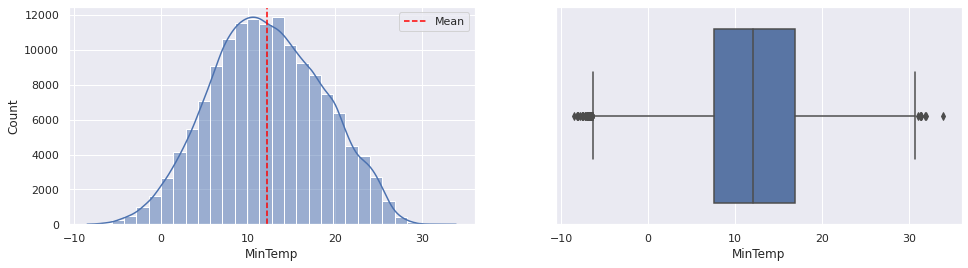

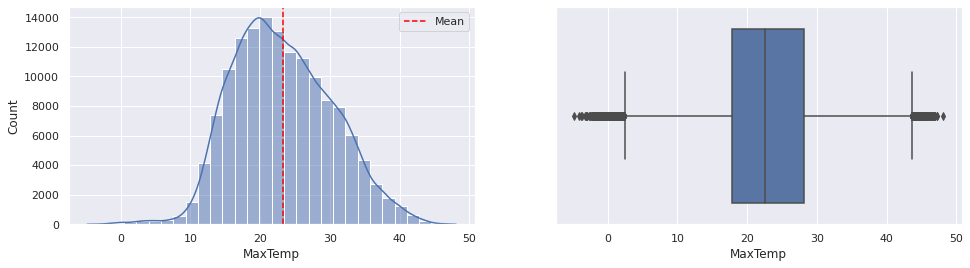

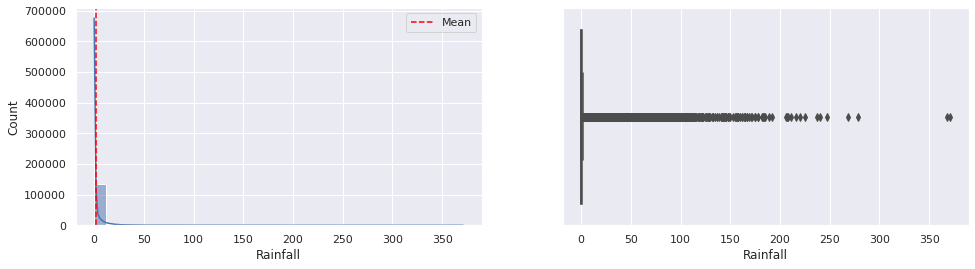

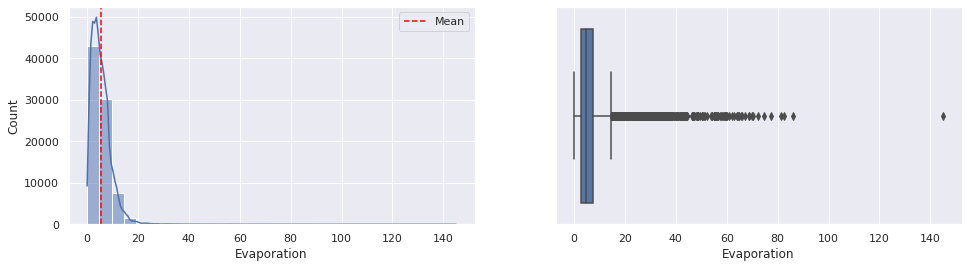

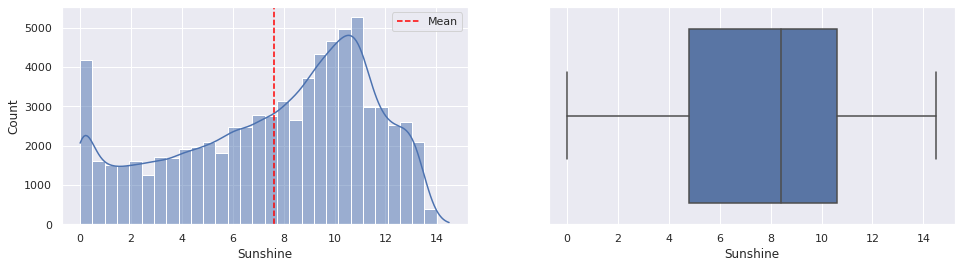

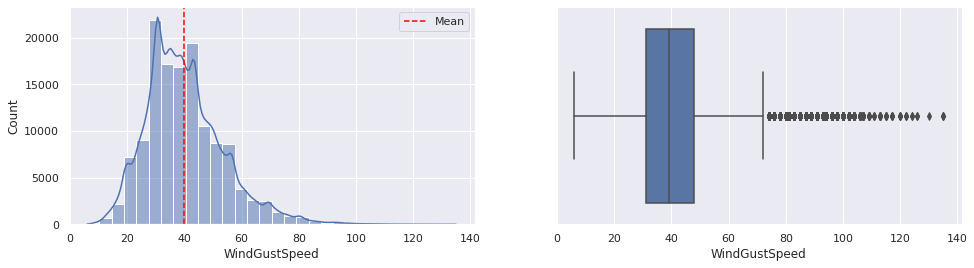

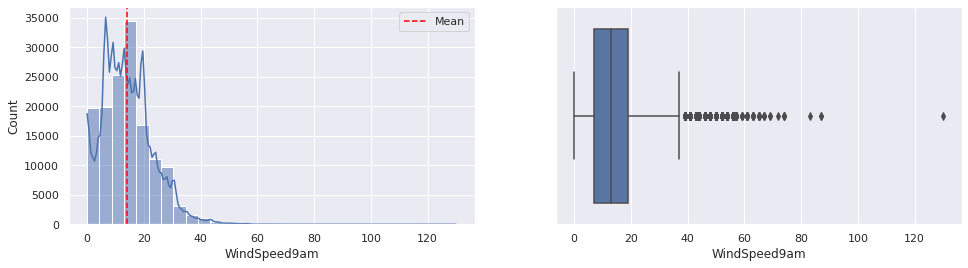

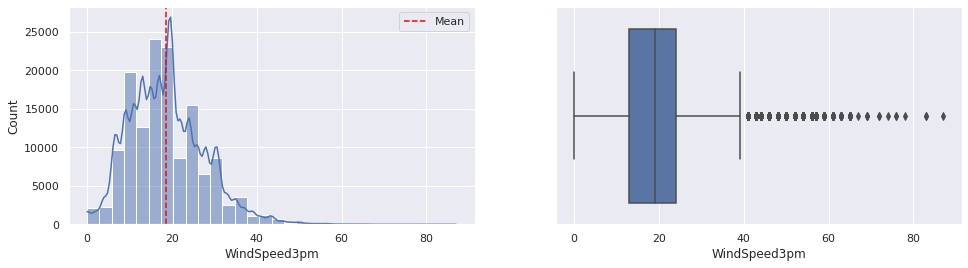

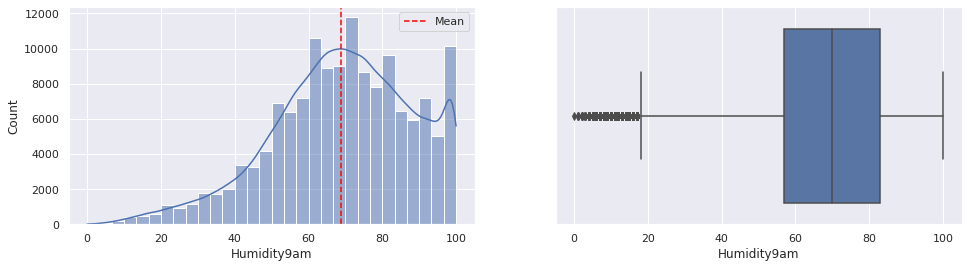

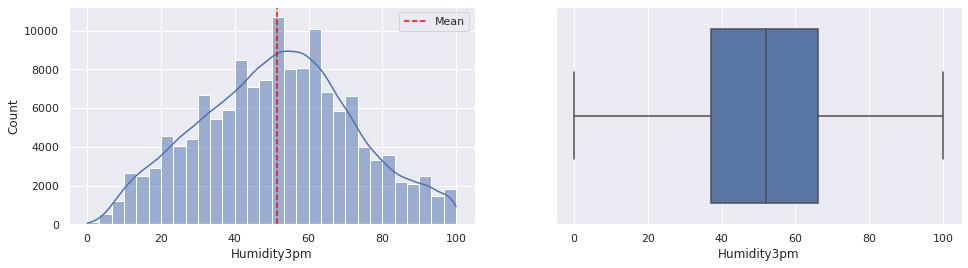

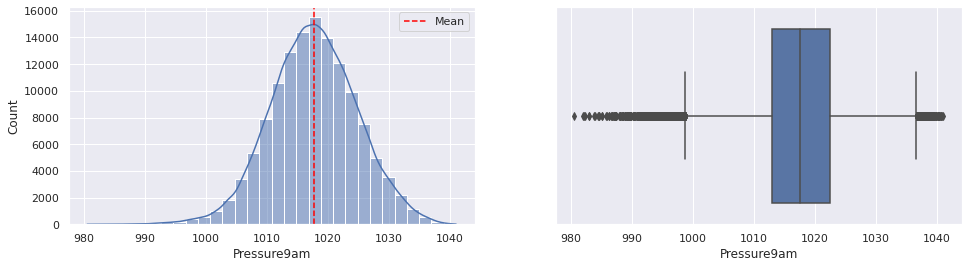

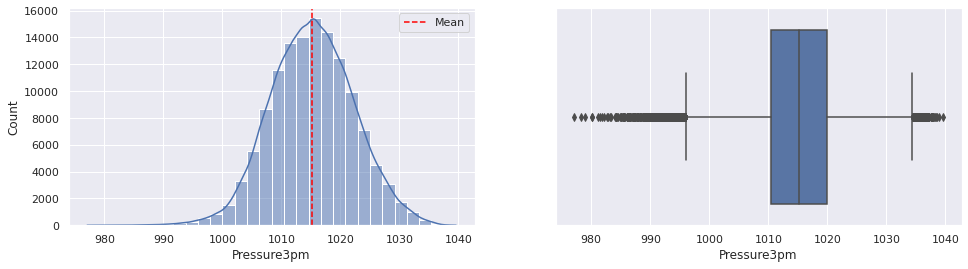

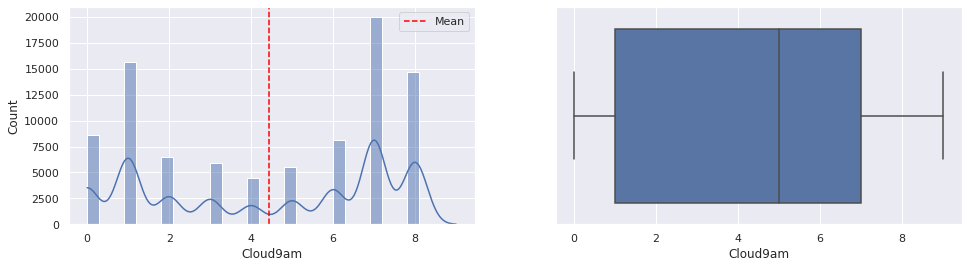

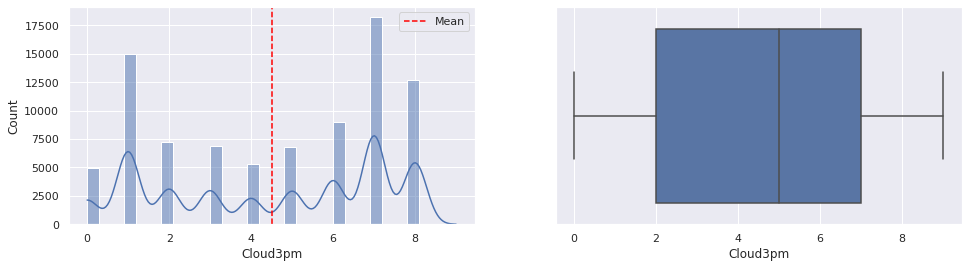

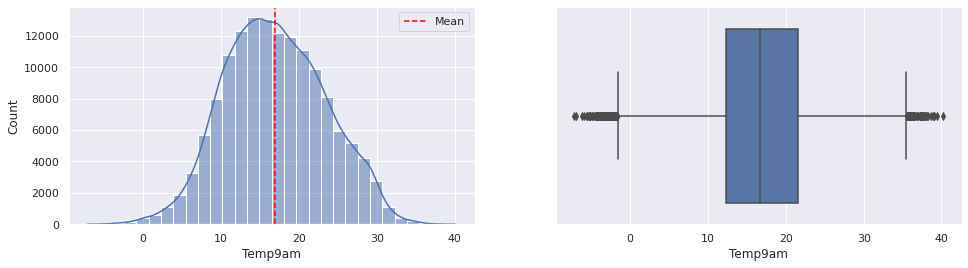

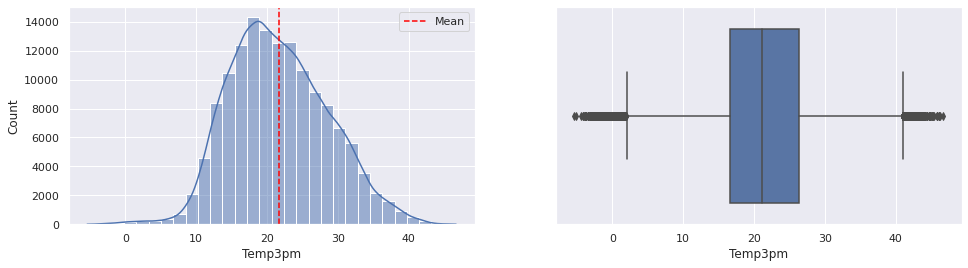

In [202]:
num_col = df._get_numeric_data()

for i in num_col:
  fig, axs = plt.subplots(1,2,figsize=(16, 4))
  sns.histplot(num_col[i], bins = 30, kde=True, ax = axs[0])
  sns.boxplot(num_col[i], ax = axs[1])

  axs[0].axvline(num_col[i].mean(), color='red', linestyle='dashed', label = 'Mean')
  axs[0].legend()

Looks like Sunshine has a huge distortion, we'll likely to drop it, but we have to check the correlation first

Check the correlation of the numeric column

---



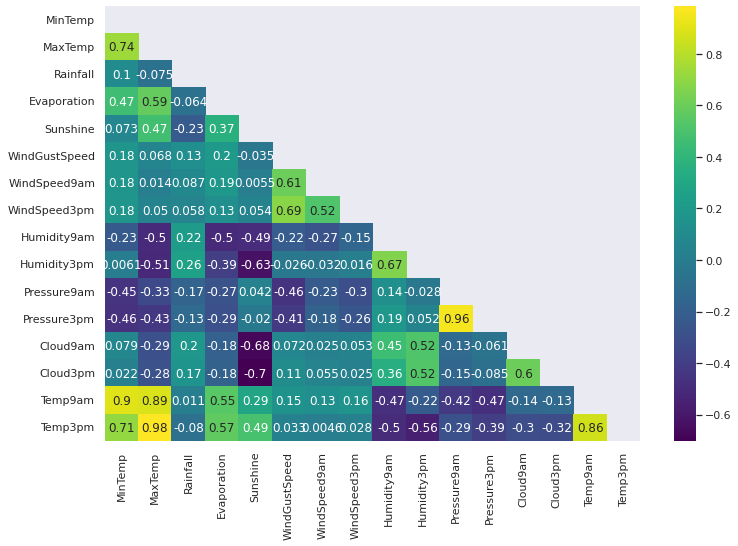

In [203]:
plt.subplots(figsize=(12,8))
mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(), annot = True,cmap = 'viridis',mask = mask)

Features that have strong correlation means they linearly dependant with other features, so they contribute less in predicting but increses the computational cost.

These are the features that have correlation above 85%:

*   MinTemp - Temp9am (90%)
*   MaxTemp - Temp3pm (98%)
* MaxTemp - Temp9am (90%)
* Pressure9am - Pressure3pm (96%)
* Temp9am - Temp3pm (86%)




**What is the precentage of each values in the target variable?**

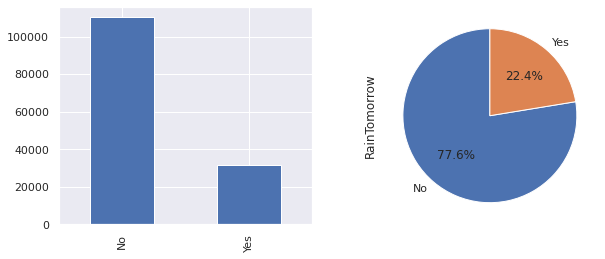

In [204]:
fig, axs = plt.subplots(ncols=2, figsize=(10,4))
df['RainTomorrow'].value_counts().plot(kind='bar', ax=axs[0])
df['RainTomorrow'].value_counts().plot.pie(autopct='%1.1f%%', startangle = 90, ax=axs[1])

There are two values inside RainTomorow column which is the target data, there are Yes and No. Yes means rains occur in a certain location and date and vice versa.

**Yes** precentage is around **22.4%** and **No** precentage is **77.6%**, which we can say **the data is imbalance**, that is why we will put this in cosideration in processing the data

**Is Wind Speed impact RainTomorrow?**

There are 3 different columns in Wind Speed, we will check each of columns impact on RainTomorrow

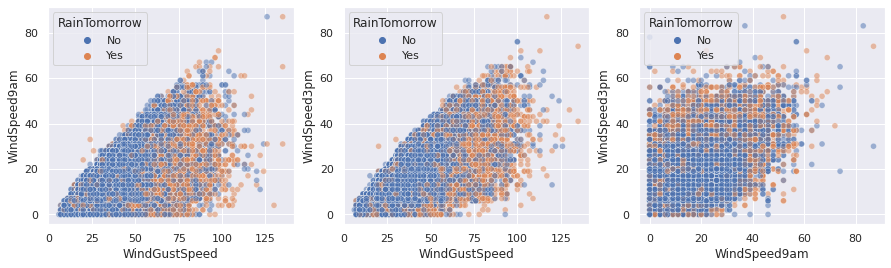

In [205]:
wind_speed = ['WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm']
wind_speed_combination = [i for i in combinations(wind_speed,2)]
fig, axs = plt.subplots(1,3,figsize=(15, 4))
for i, ws in enumerate(wind_speed_combination):
    sns.scatterplot(x=ws[0], y=ws[1], data=df, hue='RainTomorrow', ax=axs[i], alpha=0.5)

Looks like WindGustSpeed more important than WindSpeed9am and WinSpeed3pm, judging by the scatter on the distribution of RainTomorrow data. 

When WindGustSpeed is higher than 70 there is higher chance of raining tomorrow. 

We will likely to drop the WindSpeed9am and WinSpeed3pm and keep the WindGustSpeed

**What is the relationship between Humidity and pressure according to RainTomorrow?**

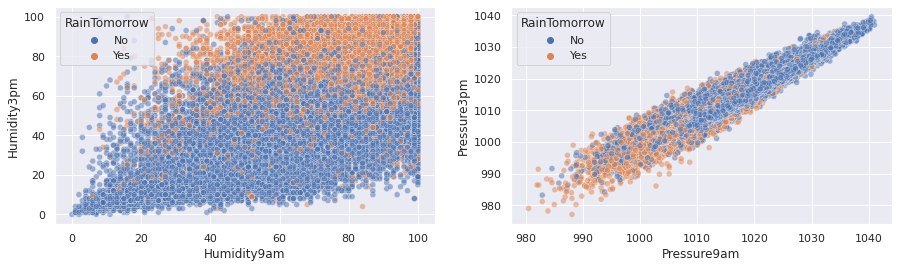

In [206]:
fig, axs = plt.subplots(1,2,figsize=(15, 4))
sns.scatterplot(x='Humidity9am', y='Humidity3pm', data=df, hue='RainTomorrow', alpha=0.5, ax=axs[0])
sns.scatterplot(x='Pressure9am', y='Pressure3pm', data=df, hue='RainTomorrow', alpha=0.5, ax=axs[1])

When the humidity high and the pressure low is likely to rain tomorrow


**Conclusion from EDA**

When humidity is high, pressure is low, WindGustSpeed is high, and Raining today there is a higher chance to rain tomorrow.

#Data Preprocessing

##Drop Missing Values

Drop missing values from the target column

In [207]:
df.dropna(subset=['RainTomorrow'], inplace = True)

Based on the correlation result These column a high correlation between other features, so we will drop it.

In [208]:
df.drop(['Temp9am','Temp3pm','Temp9am'],axis=1, inplace = True)

In Evaporation and Sunshine, too many missing values and huge distortion on the data, and since these variables are suspected as MCAR or Missing Completely At Random we decided to drop it

In [209]:
df.drop(['Evaporation','Sunshine'], axis = 1, inplace = True)

In [210]:
df.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
RainToday         1406
RainTomorrow         0
dtype: int64

##Cardinality

In [211]:
obj_col = df.select_dtypes(include=['object'])
for cat in obj_col:
  count = len(df[cat].unique())
  print(f"Cardinality od column {cat} is {count}")

Cardinality od column Date is 3436
Cardinality od column Location is 49
Cardinality od column WindGustDir is 17
Cardinality od column WindDir9am is 17
Cardinality od column WindDir3pm is 17
Cardinality od column RainToday is 3
Cardinality od column RainTomorrow is 2


We will seperate date to day, month, and year, then drop the date column

In [212]:
df['Date'] = pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

df.drop('Date', axis = 1, inplace = True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       142193 non-null  object 
 1   MinTemp        141556 non-null  float64
 2   MaxTemp        141871 non-null  float64
 3   Rainfall       140787 non-null  float64
 4   WindGustDir    132863 non-null  object 
 5   WindGustSpeed  132923 non-null  float64
 6   WindDir9am     132180 non-null  object 
 7   WindDir3pm     138415 non-null  object 
 8   WindSpeed9am   140845 non-null  float64
 9   WindSpeed3pm   139563 non-null  float64
 10  Humidity9am    140419 non-null  float64
 11  Humidity3pm    138583 non-null  float64
 12  Pressure9am    128179 non-null  float64
 13  Pressure3pm    128212 non-null  float64
 14  Cloud9am       88536 non-null   float64
 15  Cloud3pm       85099 non-null   float64
 16  RainToday      140787 non-null  object 
 17  RainTomorrow   142193 non-nul

##Feature Selection

In [213]:
X = df.loc[:, ['Location', 'MinTemp','MaxTemp','WindGustDir','WindGustSpeed','Humidity9am','Pressure3pm','RainToday','month']]
y = df['RainTomorrow']

##Split Data

In [214]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, stratify=y, random_state = 0)


##Handling Missing Value

---
We suspect all of the missing values are MCAR or Missing Completly At Random because none of the missingness has a relationship


###Handling missing value on training set

In [215]:
num_train = X_train._get_numeric_data()
num_train.isnull().sum()

MinTemp            509
MaxTemp            250
WindGustSpeed     7412
Humidity9am       1419
Pressure3pm      11138
month                0
dtype: int64

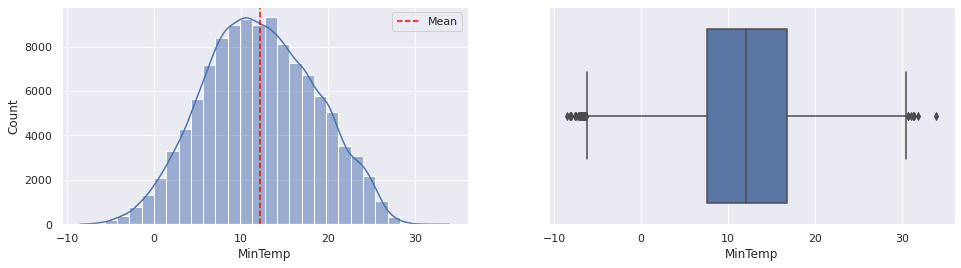

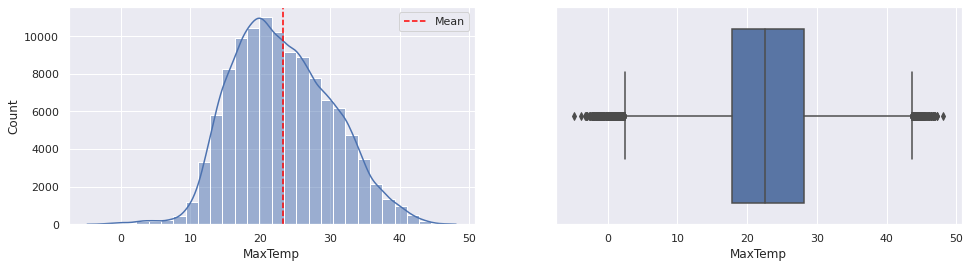

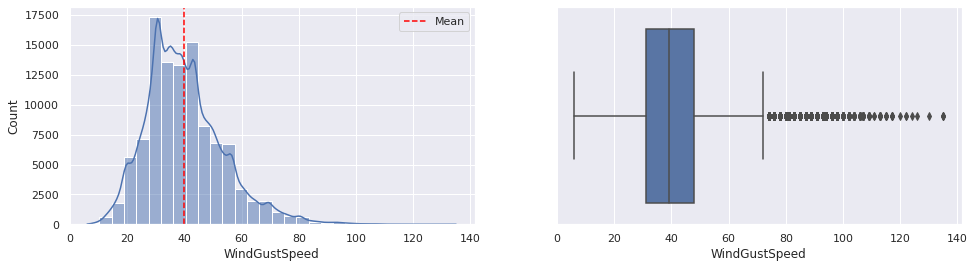

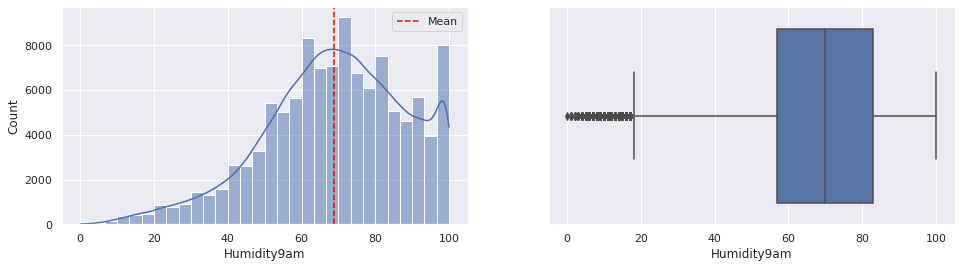

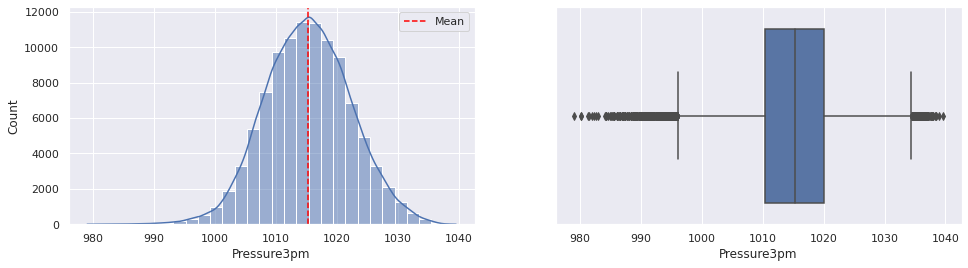

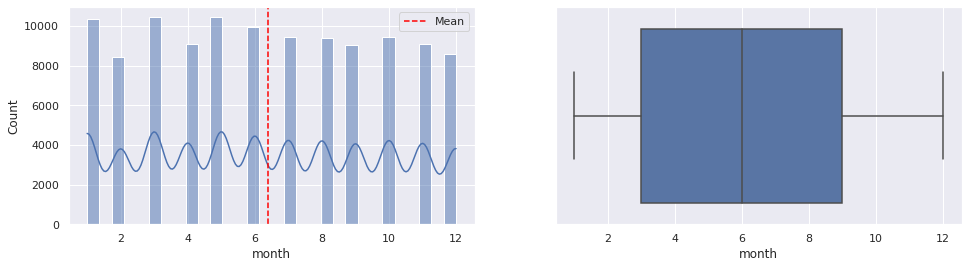

In [216]:
for i in num_train:
  fig, axs = plt.subplots(1,2,figsize=(16, 4))
  sns.histplot(num_train[i], bins = 30, kde=True, ax = axs[0])
  sns.boxplot(num_train[i], ax = axs[1])

  axs[0].axvline(num_train[i].mean(), color='red', linestyle='dashed', label = 'Mean')
  axs[0].legend()

In [217]:
cat_null = X_train.select_dtypes(include=['object']).isnull().sum()
cat_null

Location          0
WindGustDir    7461
RainToday      1100
dtype: int64

In [218]:
mean_impute = ['MinTemp','MaxTemp','WindGustSpeed','Pressure3pm']
median_impute = ['Humidity9am']
mode_impute = ['WindGustDir','RainToday']

for i in mean_impute:
  mean_value = X_train[i].mean()
  X_train[i].fillna(value=mean_value, inplace = True)
for i in median_impute:
  median_value = X_train[i].median()
  X_train[i].fillna(value=median_value, inplace = True)
for i in mode_impute:
  X_train[i].fillna(X_train[i].mode()[0], inplace=True)

X_train.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
WindGustDir      0
WindGustSpeed    0
Humidity9am      0
Pressure3pm      0
RainToday        0
month            0
dtype: int64

###Handling Missing Value on Test Set

In [219]:
mean_impute = ['MinTemp','MaxTemp','WindGustSpeed','Pressure3pm']
median_impute = ['Humidity9am']
mode_impute = ['WindGustDir','RainToday']

for i in mean_impute:
  mean_value = X_test[i].mean()
  X_test[i].fillna(value=mean_value, inplace = True)
for i in median_impute:
  median_value = X_test[i].median()
  X_test[i].fillna(value=median_value, inplace = True)
for i in mode_impute:
  X_test[i].fillna(X_test[i].mode()[0], inplace=True)

X_test.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
WindGustDir      0
WindGustSpeed    0
Humidity9am      0
Pressure3pm      0
RainToday        0
month            0
dtype: int64

In [220]:
num_test = X_test._get_numeric_data()
num_test.isnull().sum()

MinTemp          0
MaxTemp          0
WindGustSpeed    0
Humidity9am      0
Pressure3pm      0
month            0
dtype: int64

##Handling Outliers

cara 1

In [221]:
num_train = X_train._get_numeric_data()
for k, v in num_train.items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  iqr = q3 - q1
  v_col = v[(v <= q1 - 1.5 * iqr) | (v >= q3 + 1.5 * iqr)]
  perc = np.shape(v_col)[0] * 100.0 / np.shape(num_train)[0]
  print("Column %s outliers = %.2f%%" % (k, perc))

Column MinTemp outliers = 0.04%
Column MaxTemp outliers = 0.32%
Column WindGustSpeed outliers = 3.81%
Column Humidity9am outliers = 1.12%
Column Pressure3pm outliers = 1.67%
Column month outliers = 0.00%


In [222]:
outliers_index = []
def outliers_drop(X_train, variable):
  q1 = X_train[variable].quantile(0.25)
  q3 = X_train[variable].quantile(0.75)
  iqr = q3 - q1
  threshold = 1.5 * iqr

  upper_whisker = q3 + threshold
  lower_whisker = q1 - threshold

  for index, x in enumerate(X_train[variable]):
    if x <= lower_whisker or x >= upper_whisker:
      outliers_index.append(index)
  return outliers_index

In [223]:
cols = ['MinTemp','MaxTemp','WindGustSpeed','Humidity9am','Pressure3pm']
# for i in cols:
#   outliers_drop(X_train, i)
print(outliers_index)
print('Shape Y train: ',y_train.shape)
print('Shape_X_train : ',X_train.shape)

[]
Shape Y train:  (113754,)
Shape_X_train :  (113754, 9)


In [224]:
# for i in outliers_index:
#   if i in y_train:
#     y_train.drop(i, inplace = True)
#   else:
#     break
y_train.shape

(113754,)

In [225]:
# for i in outliers_index:
#   if i in X_train:
#     X_train.drop(i, inplace=True)
#   else:
#     break
X_train.shape

(113754, 9)

cara 2

In [226]:
# Function to find upper and lower boundaries for skewed distributed variables
# Let's calculate the boundaries outside which sit the outliers for skewed distributions
# Distance passed as an argument, gives us the option to estimate 1.5 times or 3 times the IQR to calculate the boundaries.

def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [227]:
# # Limits for `MinTemp`
# MinTemp_upper_limit, MinTemp_lower_limit = find_skewed_boundaries(X_train, 'MinTemp', 1.5)
# MinTemp_upper_limit, MinTemp_lower_limit

# # Limits for `MaxTemp`
# MaxTemp_upper_limit, MaxTemp_lower_limit = find_skewed_boundaries(X_train, 'MaxTemp', 1.5)
# MaxTemp_upper_limit, MaxTemp_lower_limit

# # Limits for `WindGustSpeed`
# WindGustSpeed_upper_limit, WindGustSpeed_lower_limit = find_skewed_boundaries(X_train, 'WindGustSpeed', 1.5)
# WindGustSpeed_upper_limit, WindGustSpeed_lower_limit

# # Limits for `MinTemp`
# WindSpeed9am_upper_limit, WindSpeed9am_lower_limit = find_skewed_boundaries(X_train, 'WindSpeed9am', 1.5)
# WindSpeed9am_upper_limit, WindSpeed9am_lower_limit

# # Limits for `MaxTemp`
# WindSpeed3pm_upper_limit, WindSpeed3pm_lower_limit = find_skewed_boundaries(X_train, 'WindSpeed3pm', 1.5)
# WindSpeed3pm_upper_limit, WindSpeed3pm_lower_limit

# # Limits for `WindGustSpeed`
# Humidity9am_upper_limit, Humidity9am_lower_limit = find_skewed_boundaries(X_train, 'Humidity9am', 1.5)
# Humidity9am_upper_limit, Humidity9am_lower_limit
# # Limits for `MaxTemp`
# Pressure9am_upper_limit, Pressure9am_lower_limit = find_skewed_boundaries(X_train, 'Pressure9am', 1.5)
# Pressure9am_upper_limit, Pressure9am_lower_limit

# # Limits for `WindGustSpeed`
# Pressure3pm_upper_limit, Pressure3pm_lower_limit = find_skewed_boundaries(X_train, 'Pressure3pm', 1.5)
# Pressure3pm_upper_limit, Pressure3pm_lower_limit

In [228]:
# # Check the index of the data we will trim 

# mintemp_index_drop_train = X_train.index[X_train['MinTemp'] < MinTemp_upper_limit ]
# mintemp_index_drop_train.nunique()

# maxtemp_index_drop_train = X_train.index[X_train['MaxTemp'] > MaxTemp_upper_limit ]
# maxtemp_index_drop_train.nunique()

# WindGustSpeed_index_drop_train = X_train.index[X_train['WindGustSpeed'] > WindGustSpeed_upper_limit ]
# WindGustSpeed_index_drop_train.nunique()

# WindSpeed9am_index_drop_train = X_train.index[X_train['WindSpeed9am'] > WindSpeed9am_upper_limit ]
# WindSpeed9am_index_drop_train.nunique()

# WindSpeed3pm_index_drop_train = X_train.index[X_train['WindSpeed3pm'] > WindSpeed3pm_upper_limit ]
# WindSpeed3pm_index_drop_train.nunique()

# Humidity9am_index_drop_train = X_train.index[X_train['Humidity9am'] > Humidity9am_upper_limit ]
# Humidity9am_index_drop_train.nunique()

# Pressure9am_index_drop_train = X_train.index[X_train['Pressure9am'] > WindSpeed9am_upper_limit ]
# Pressure9am_index_drop_train.nunique()

# Pressure3pm_index_drop_train = X_train.index[X_train['Pressure3pm'] > Pressure3pm_upper_limit ]
# Pressure3pm_index_drop_train.nunique()

In [229]:
# y_train = y_train.drop(mintemp_index_drop_train.tolist())
# y_train = y_train.drop(maxtemp_index_drop_train.tolist())
# y_train = y_train.drop(WindGustSpeed_index_drop_train.tolist())
# y_train = y_train.drop(WindSpeed9am_index_drop_train.tolist())
# y_train = y_train.drop(WindSpeed3pm_index_drop_train.tolist())
# y_train = y_train.drop(Humidity9am_index_drop_train.tolist())
# y_train = y_train.drop(Pressure9am_index_drop_train.tolist())
# y_train = y_train.drop(Pressure3pm_index_drop_train.tolist())
# y_train = y_train.drop(mintemp_index_drop_train.tolist())


In [230]:
y_train.iloc[3354]

'No'

###handling Outliers on Train Set

In [231]:
# Create the capper

windsoriser = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=['MinTemp','MaxTemp','WindGustSpeed','Humidity9am','Pressure3pm'])

windsoriser.fit(X_train)

X_train = windsoriser.transform(X_train)

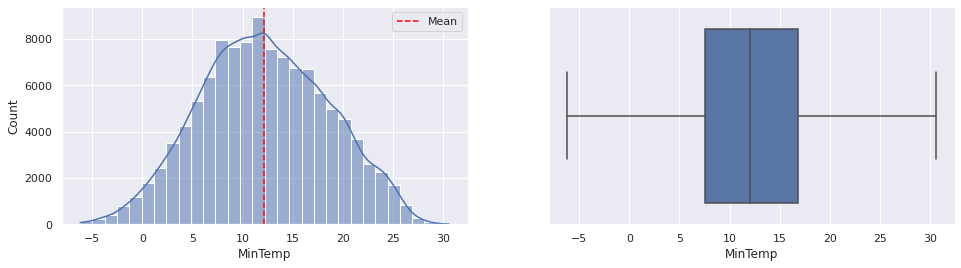

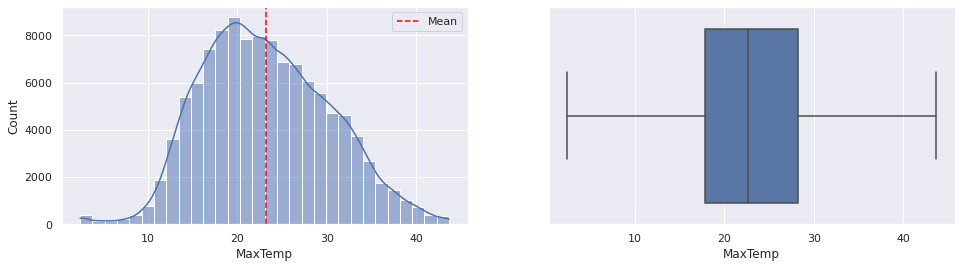

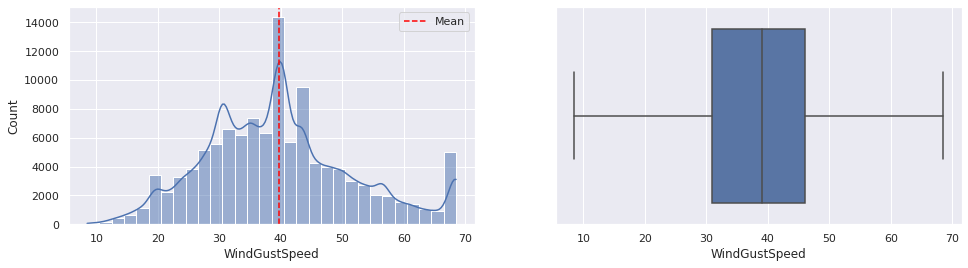

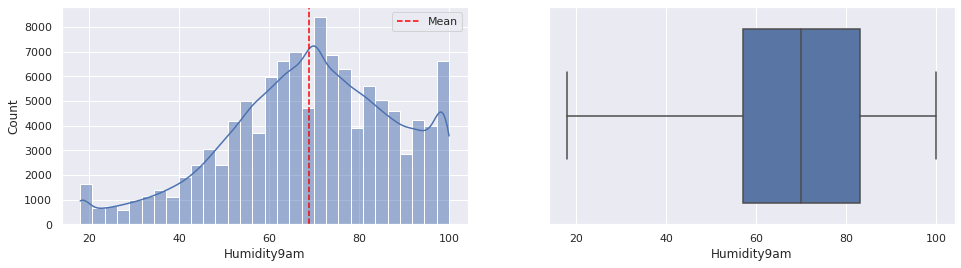

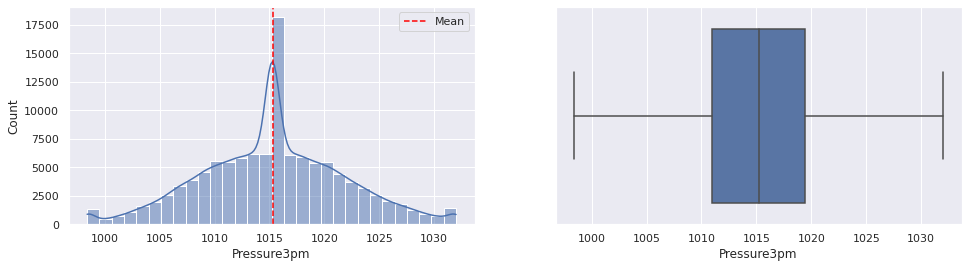

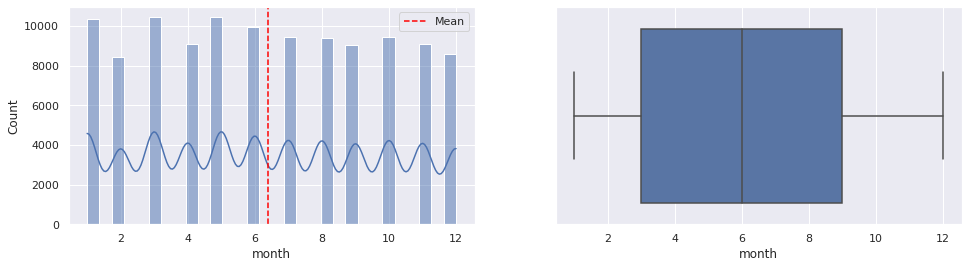

In [232]:
num_train = X_train._get_numeric_data()
for i in num_train:
  fig, axs = plt.subplots(1,2,figsize=(16, 4))
  sns.histplot(num_train[i], bins = 30, kde=True, ax = axs[0])
  sns.boxplot(num_train[i], ax = axs[1])

  axs[0].axvline(num_train[i].mean(), color='red', linestyle='dashed', label = 'Mean')
  axs[0].legend()

###Handling Outliers on Test Set

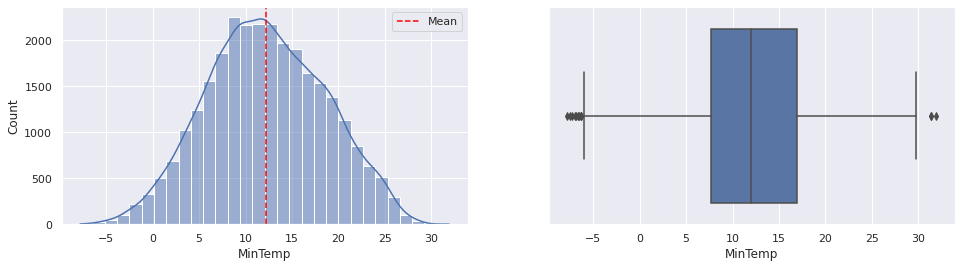

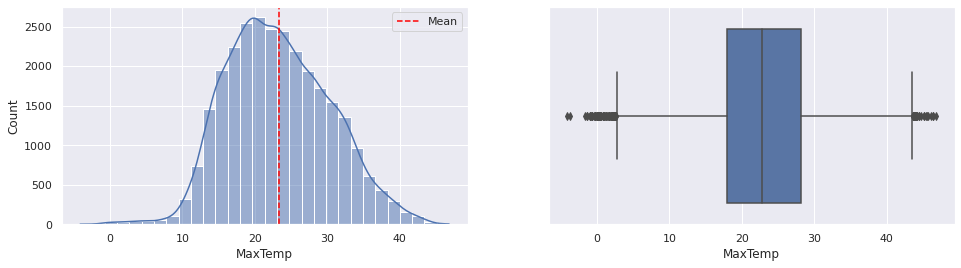

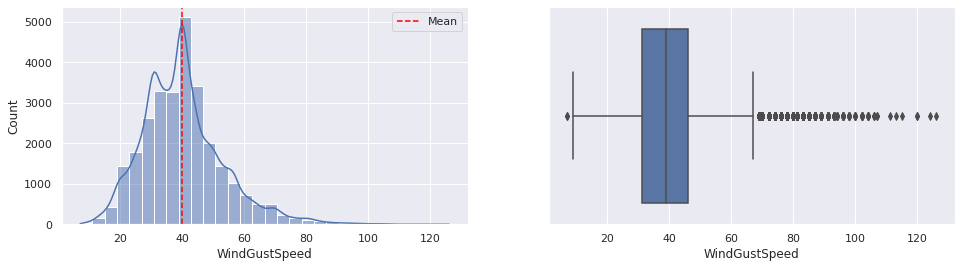

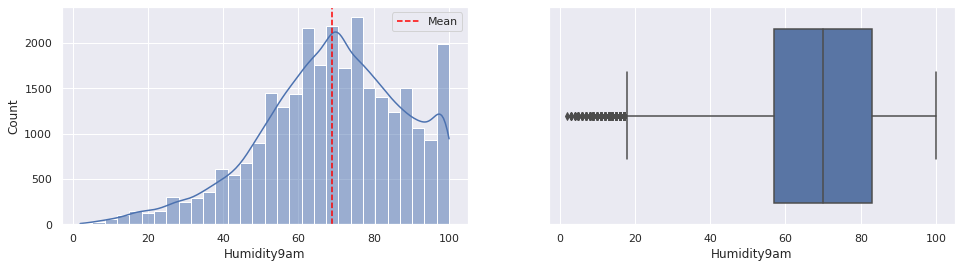

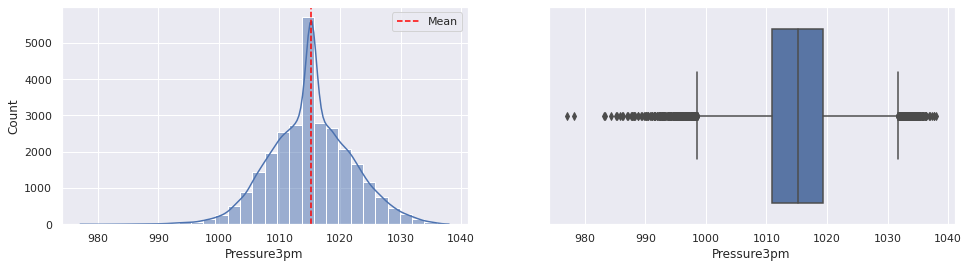

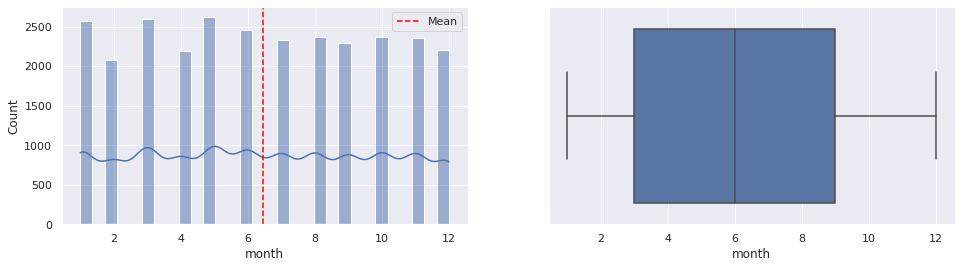

In [233]:
for i in num_test:
  fig, axs = plt.subplots(1,2,figsize=(16, 4))
  sns.histplot(num_test[i], bins = 30, kde=True, ax = axs[0])
  sns.boxplot(num_test[i], ax = axs[1])

  axs[0].axvline(num_test[i].mean(), color='red', linestyle='dashed', label = 'Mean')
  axs[0].legend()

In [234]:
# Create the capper

windsoriser = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=['MinTemp','MaxTemp','WindGustSpeed','Humidity9am','Pressure3pm'])

windsoriser.fit(X_test)

X_test = windsoriser.transform(X_test)

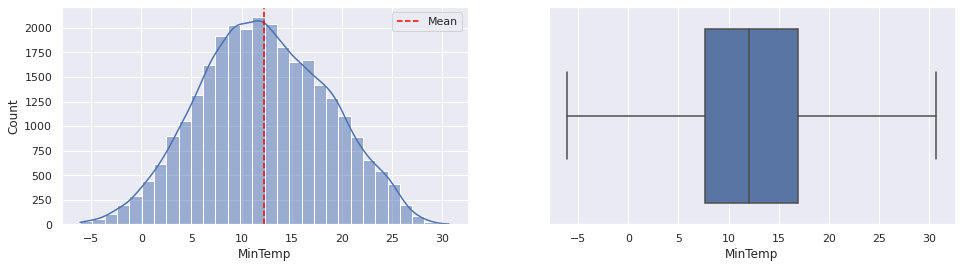

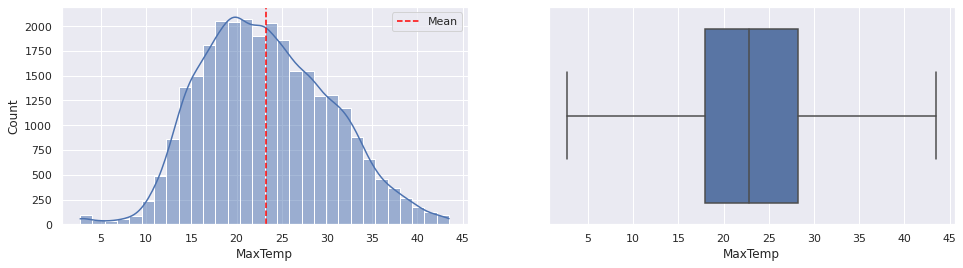

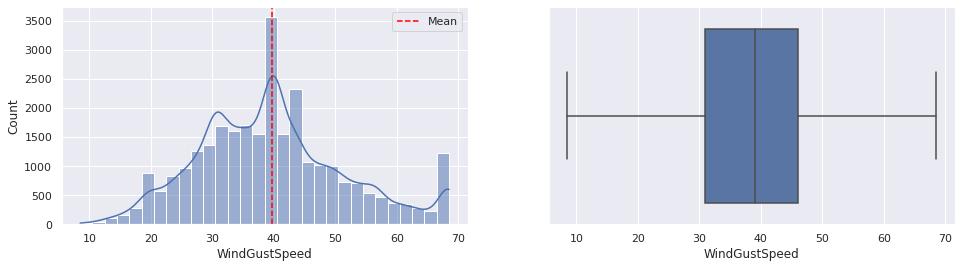

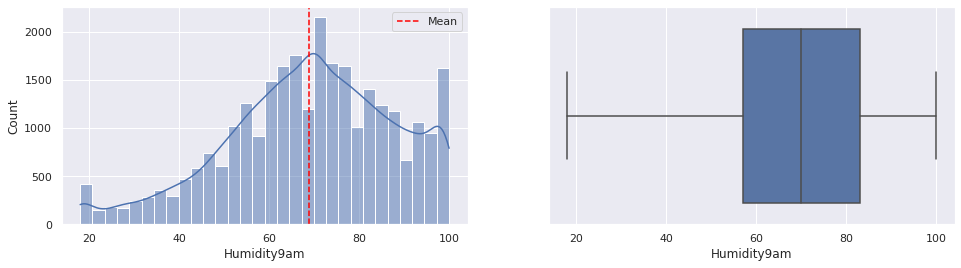

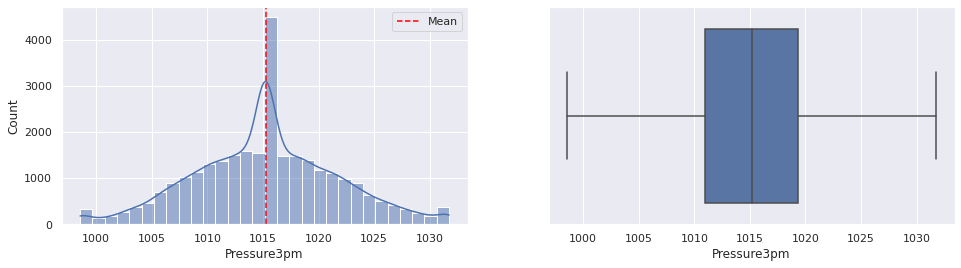

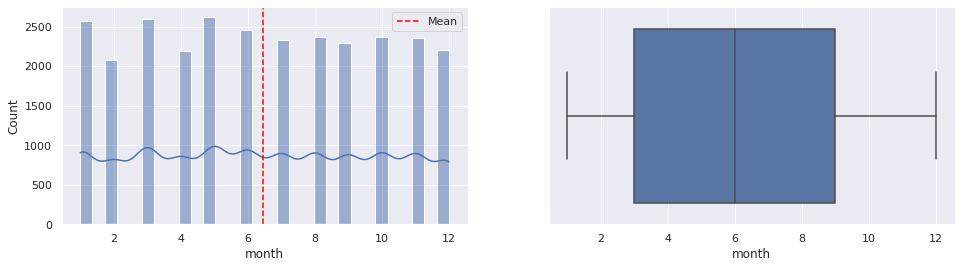

In [235]:
num_test = X_test._get_numeric_data()
for i in num_test:
  fig, axs = plt.subplots(1,2,figsize=(16, 4))
  sns.histplot(num_test[i], bins = 30, kde=True, ax = axs[0])
  sns.boxplot(num_test[i], ax = axs[1])

  axs[0].axvline(num_test[i].mean(), color='red', linestyle='dashed', label = 'Mean')
  axs[0].legend()

##Future Encoding

In [236]:
X_train = pd.get_dummies(X_train, prefix='', prefix_sep='', 
                            columns=['Location', 'WindGustDir','RainToday'])
X_test = pd.get_dummies(X_test, prefix='', prefix_sep='', 
                            columns=['Location', 'WindGustDir','RainToday'])

In [237]:
X_train.shape

(113754, 73)

In [238]:
X_train

,MinTemp,MaxTemp,WindGustSpeed,Humidity9am,Pressure3pm,month,Adelaide,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,CoffsHarbour,Dartmoor,Darwin,GoldCoast,Hobart,Katherine,Launceston,Melbourne,MelbourneAirport,Mildura,Moree,MountGambier,MountGinini,Newcastle,Nhil,NorahHead,NorfolkIsland,Nuriootpa,PearceRAAF,Penrith,Perth,PerthAirport,Portland,Richmond,Sale,SalmonGums,Sydney,SydneyAirport,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,No,Yes
1055,8.1,23.5,33.000000,54.0,1014.3,11,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
142359,18.8,35.4,41.000000,69.0,1011.4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
128926,10.2,22.7,31.000000,65.0,1017.7,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
88311,23.2,31.0,26.000000,80.0,1006.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
137465,20.1,29.9,52.000000,23.0,1011.5,10,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94763,25.0,32.2,52.000000,74.0,1011.9,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
56551,9.6,23.1,50.000000,62.0,1014.5,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
6422,23.3,37.2,33.000000,46.0,1015.2,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
18593,19.1,28.1,43.000000,70.0,1010.9,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


##Build Pipeline

In [239]:
pipe_log = Pipeline([
('scaler', StandardScaler()),
('logreg', LogisticRegression(random_state=0))])

pipe_svm = Pipeline([
('scaler', StandardScaler()),
('svc', SVC(random_state=0))])

#Modelling & Evaluation

**Linear Regression**

In [240]:
pipe_log.fit(X_train, y_train)
print('Training Score: ',round(pipe_log.score(X_train, y_train),4))
print('Testing Score: ', round(pipe_log.score(X_test, y_test),4))

Training Score:  0.822
Testing Score:  0.8203


In [241]:
y_logreg_pred = pipe_log.predict(X_test)
y_logreg_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

**Confusion Matrix**

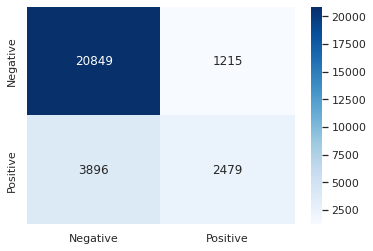

In [242]:
cf_matrix_logreg = confusion_matrix(y_test, y_logreg_pred)
sns.set(rc={'figure.figsize':(6,4)})

ax = sns.heatmap(cf_matrix_logreg, annot = True,cmap='Blues', fmt='g')
ax.set_xticklabels(["Negative", "Positive"])
ax.set_yticklabels(["Negative", "Positive"])
plt.show()

In [243]:
print(classification_report(y_test, y_logreg_pred))

              precision    recall  f1-score   support

          No       0.84      0.94      0.89     22064
         Yes       0.67      0.39      0.49      6375

    accuracy                           0.82     28439
   macro avg       0.76      0.67      0.69     28439
weighted avg       0.80      0.82      0.80     28439



**SVM**

In [244]:
pipe_svm.fit(X_train, y_train)
print('Training Score: ',round(pipe_svm.score(X_train, y_train),4))
print('Testing Score: ', round(pipe_svm.score(X_test, y_test),4))

Training Score:  0.8403
Testing Score:  0.8305


In [245]:
y_svm_pred = pipe_log.predict(X_test)
y_svm_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

**Confusion Matrix**

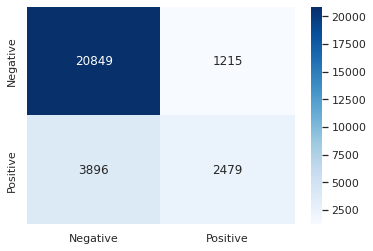

In [246]:
cf_matrix_svm = confusion_matrix(y_test, y_svm_pred)
sns.set(rc={'figure.figsize':(6,4)})

ax = sns.heatmap(cf_matrix_svm, annot = True,cmap='Blues', fmt='g')
ax.set_xticklabels(["Negative", "Positive"])
ax.set_yticklabels(["Negative", "Positive"])
plt.show()

In [247]:
cf_matrix_svm

array([[20849,  1215],
       [ 3896,  2479]])

In [248]:
print(classification_report(y_test, y_svm_pred))

              precision    recall  f1-score   support

          No       0.84      0.94      0.89     22064
         Yes       0.67      0.39      0.49      6375

    accuracy                           0.82     28439
   macro avg       0.76      0.67      0.69     28439
weighted avg       0.80      0.82      0.80     28439



#Model Inference

In [249]:
df_inf = shuffle(df)
df_inf

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow,year,month,day
132878,Hobart,16.3,21.1,0.4,W,93.0,W,WSW,28.0,26.0,43.0,27.0,999.2,1007.2,6.0,2.0,No,No,2017,1,24
134770,Launceston,12.5,26.9,0.0,NW,48.0,N,NW,4.0,24.0,69.0,43.0,1008.8,1005.0,NaN,NaN,No,Yes,2013,12,3
143229,Katherine,14.0,34.5,0.0,E,43.0,NE,ESE,9.0,13.0,52.0,NaN,1018.1,1013.3,0.0,NaN,No,No,2015,9,12
19875,NorahHead,19.3,28.6,0.0,NE,43.0,NNE,NE,22.0,33.0,73.0,67.0,1017.2,1014.5,NaN,NaN,No,No,2014,1,29
38554,WaggaWagga,3.6,20.0,0.0,SW,43.0,W,WSW,15.0,28.0,66.0,36.0,1019.3,1018.0,0.0,5.0,No,No,2014,10,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29014,Richmond,7.6,22.5,0.0,N,17.0,NaN,ENE,0.0,4.0,74.0,42.0,1021.6,1018.6,NaN,NaN,No,No,2014,4,21
24060,NorfolkIsland,18.0,23.4,0.0,ESE,35.0,SE,ESE,20.0,17.0,60.0,53.0,1023.7,1021.5,1.0,6.0,No,No,2017,4,19
827,Albury,11.4,28.7,0.0,NE,30.0,E,NNE,6.0,17.0,71.0,34.0,1017.5,1013.2,NaN,2.0,No,No,2011,3,8
77981,Portland,8.6,15.8,2.0,W,20.0,N,WNW,2.0,7.0,93.0,90.0,1029.7,1029.1,8.0,8.0,Yes,Yes,2017,6,18


Future Selection

In [250]:
X_inf = df_inf.loc[:, ['Location', 'MinTemp','MaxTemp','WindGustDir','WindGustSpeed','Humidity9am','Pressure3pm','RainToday','month']]
y_inf = df_inf['RainTomorrow']

In [251]:
print(X_inf.shape)
print(y_inf.shape)

(142193, 9)
(142193,)


In [252]:
X_inf

,Location,MinTemp,MaxTemp,WindGustDir,WindGustSpeed,Humidity9am,Pressure3pm,RainToday,month
132878,Hobart,16.3,21.1,W,93.0,43.0,1007.2,No,1
134770,Launceston,12.5,26.9,NW,48.0,69.0,1005.0,No,12
143229,Katherine,14.0,34.5,E,43.0,52.0,1013.3,No,9
19875,NorahHead,19.3,28.6,NE,43.0,73.0,1014.5,No,1
38554,WaggaWagga,3.6,20.0,SW,43.0,66.0,1018.0,No,10
...,...,...,...,...,...,...,...,...,...
29014,Richmond,7.6,22.5,N,17.0,74.0,1018.6,No,4
24060,NorfolkIsland,18.0,23.4,ESE,35.0,60.0,1021.5,No,4
827,Albury,11.4,28.7,NE,30.0,71.0,1013.2,No,3
77981,Portland,8.6,15.8,W,20.0,93.0,1029.1,Yes,6


In [253]:
y_inf

132878     No
134770    Yes
143229     No
19875      No
38554      No
         ... 
29014      No
24060      No
827        No
77981     Yes
141778     No
Name: RainTomorrow, Length: 142193, dtype: object

Handling Missing Value

In [254]:
X_inf.isnull().sum()

Location             0
MinTemp            637
MaxTemp            322
WindGustDir       9330
WindGustSpeed     9270
Humidity9am       1774
Pressure3pm      13981
RainToday         1406
month                0
dtype: int64

In [255]:
mean_impute = ['MinTemp','MaxTemp','WindGustSpeed','Pressure3pm']
median_impute = ['Humidity9am']
mode_impute = ['WindGustDir','RainToday']

for i in mean_impute:
  mean_value = X_inf[i].mean()
  X_inf[i].fillna(value=mean_value, inplace = True)
for i in median_impute:
  median_value = X_inf[i].median()
  X_inf[i].fillna(value=median_value, inplace = True)
for i in mode_impute:
  X_inf[i].fillna(X_inf[i].mode()[0], inplace=True)

X_inf.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
WindGustDir      0
WindGustSpeed    0
Humidity9am      0
Pressure3pm      0
RainToday        0
month            0
dtype: int64

Handling Outliers

In [256]:
num_inf = X_inf._get_numeric_data()
for k, v in num_inf.items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  iqr = q3 - q1
  v_col = v[(v <= q1 - 1.5 * iqr) | (v >= q3 + 1.5 * iqr)]
  perc = np.shape(v_col)[0] * 100.0 / np.shape(num_inf)[0]
  print("Column %s outliers = %.2f%%" % (k, perc))

Column MinTemp outliers = 0.04%
Column MaxTemp outliers = 0.32%
Column WindGustSpeed outliers = 3.79%
Column Humidity9am outliers = 1.14%
Column Pressure3pm outliers = 1.66%
Column month outliers = 0.00%


In [257]:
# Create the capper

windsoriser = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=['MinTemp','MaxTemp','WindGustSpeed','Humidity9am','Pressure3pm'])

windsoriser.fit(X_inf)

X_inf = windsoriser.transform(X_inf)

In [258]:
def diagnostic_plots(X_inf, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=X_inf[variable])
    plt.title('Boxplot')

    plt.show()

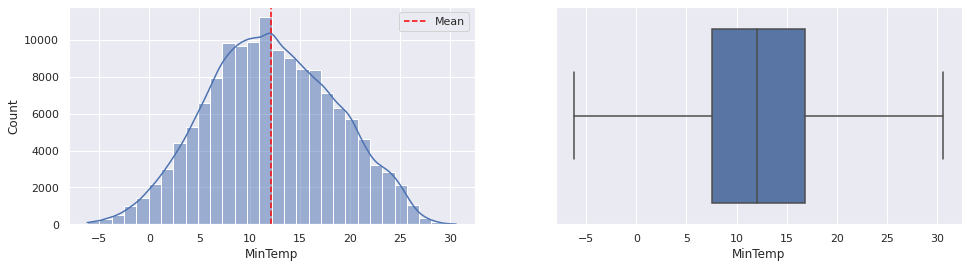

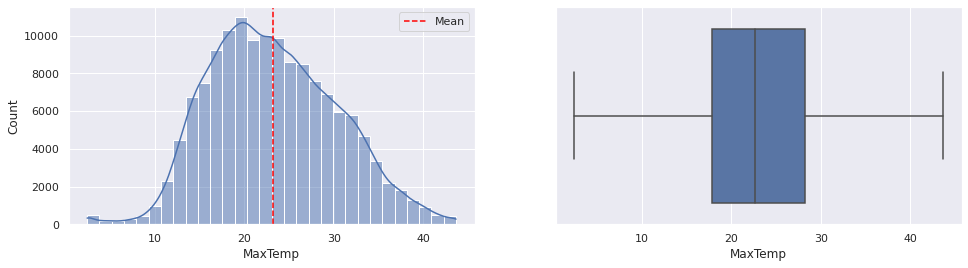

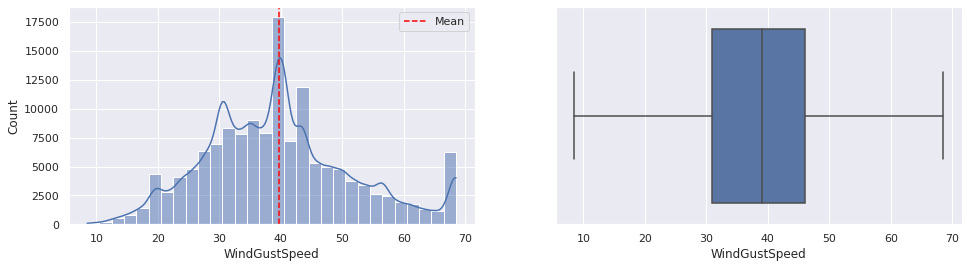

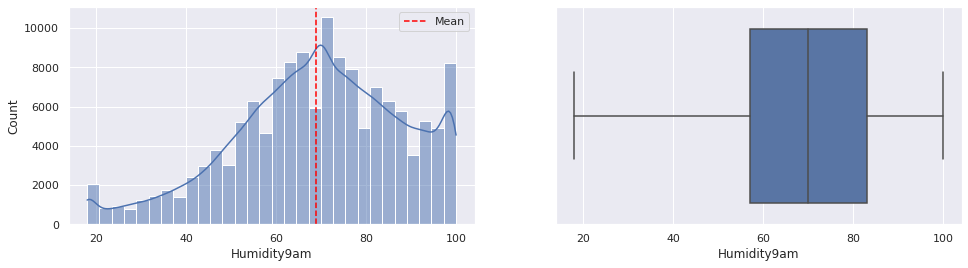

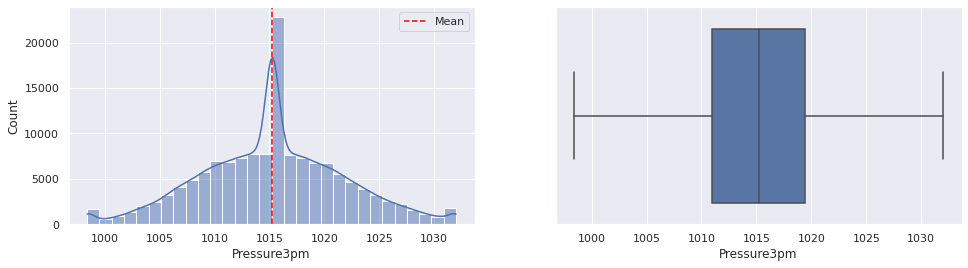

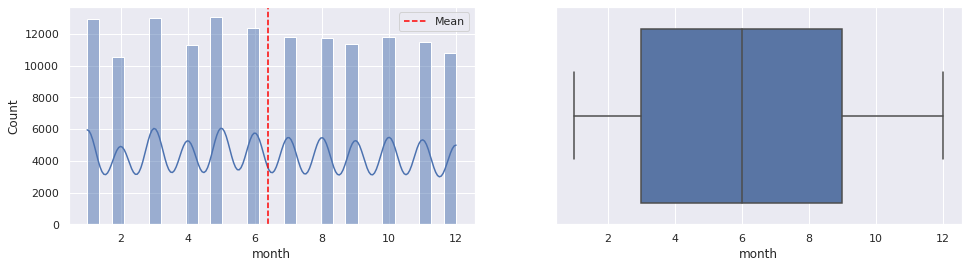

In [259]:
num_test = X_inf._get_numeric_data()
for i in num_test:
  fig, axs = plt.subplots(1,2,figsize=(16, 4))
  sns.histplot(num_test[i], bins = 30, kde=True, ax = axs[0])
  sns.boxplot(num_test[i], ax = axs[1])

  axs[0].axvline(num_test[i].mean(), color='red', linestyle='dashed', label = 'Mean')
  axs[0].legend()

Feature Encoding

In [260]:
X_inf = pd.get_dummies(X_inf, prefix='', prefix_sep='', 
                            columns=['Location', 'WindGustDir','RainToday'])

Build Pipeline

In [261]:
pipe_svm = Pipeline([
('scaler', StandardScaler()),
('svc', SVC(random_state=0))])

Modelling & Evaluation

In [262]:
pipe_svm.fit(X_inf, y_inf)
print('Score: ',round(pipe_svm.score(X_inf, y_inf),4))

Score:  0.8394


In [263]:
X_inf.shape

(142193, 73)

In [264]:
y_inv_pred = pipe_svm.predict(X_inf)
y_inv_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [265]:
yes = 0
no = 0
for i in y_inv_pred:
  if i == 'Yes':
    yes+=1
  else:
    no+=1
print('yes precentage:', round(yes/len(y_inv_pred),2)*100, '%')
print('no precentage:', round(no/len(y_inv_pred),2)*100, '%')

yes precentage: 13.0 %
no precentage: 87.0 %


#Conclusion

Using Rain in Australia dataset, 

there are features that have correlation above 85%:

*   MinTemp - Temp9am (90%)
*   MaxTemp - Temp3pm (98%)
* MaxTemp - Temp9am (90%)
* Pressure9am - Pressure3pm (96%)
* Temp9am - Temp3pm (86%)

There are factors of higher chance that tomorrow will rain which are when:

* humidity is high
* pressure is low
* WindGustSpeed is high
* Raining today 

Features that we decided to keep are Location         ,
MinTemp          ,
MaxTemp          ,
WindGustDir      ,
WindGustSpeed    ,
Humidity9am      ,
Pressure3pm      ,
RainToday        ,
month.

Using 2 different models which are Logistic Regression and SVC module in SVM, 

**Logistic Regression Result score** on train and test score is **right fit at 82%** and using **SVM**, the train set score is at 84% and test set score is 83%, means slightly better in training score at 1% but we still tollerate it to be **right fit**.

In **F1 Score**, **Both SVM and Logistic Regression** has the same score which at **82%**

